In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2, min_l1
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *
from sparse_rf.util.fns import *
from functools import partial
import random
import gc

In [2]:
m = 1000
d = 100
N = 10000
active = fourier

ratio_train = 0.7

In [3]:
qs = [1, 2, 3, 4, 5, 100]

In [5]:
X = make_X(d, m, dist=uniform)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

y = fn3(X.T)
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

seeds = [13]

results_l1 = []
coefficients_l1 = []
results_l1_sparse = []
coefficients_l1_sparse = []
for q in qs:
    res_l1 = []
    res_l1_sparse = []
    coef_l1 = []
    coef_l1_sparse = []
    
    for seed in seeds:
        random.seed(seed)
        np.random.seed(seed)

        W = make_W(d, q, N=N, dist=partial(normal, stdev=1))
        A_train = make_A(X_train, W, active=active)
        A_test = make_A(X_test, W, active=active)

        c_l1 = min_l1(A_train, y_train)
        c_l1_sparse = min_l1(A_train, y_train, sigma=4)

        res_l1.append(np.linalg.norm(A_test@c_l1 - y_test) / np.linalg.norm(y_test))
        res_l1_sparse.append(np.linalg.norm(A_test@c_l1_sparse - y_test) / np.linalg.norm(y_test))
        coef_l1.append(c_l1)
        coef_l1_sparse.append(c_l1_sparse)


        del W
        del A_train
        del A_test
        del c_l1
        del c_l1_sparse

        gc.collect()

    results_l1.append(res_l1)
    results_l1_sparse.append(res_l1_sparse)
    coefficients_l1.append(coef_l1)
    coefficients_l1_sparse.append(coef_l1_sparse)

Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max BB scaling to 0.01
Linesearch failed with error 1. Damping max BB scaling to 0.001
Linesearch failed with error 1. Damping max BB scaling to 0.0001
Linesearch failed with error 1. Damping max BB scaling to 10000.0
Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max 

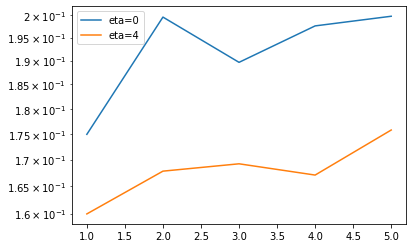

In [10]:
plt.semilogy(qs[:-1], [np.mean(res) for res in results_l1[:-1]], label="eta=0")
plt.semilogy(qs[:-1], [np.mean(res) for res in results_l1_sparse[:-1]], label="eta=4")
plt.legend()
plt.show()

In [34]:
sparsity_l1 = []
for coefs in coefficients_l1:
    sparsity_l1.append(np.mean([len(c.nonzero()[0]) for c in coefs]))

sparsity_l1_sparse = []
for coefs in coefficients_l1_sparse:
    sparsity_l1_sparse.append(np.mean([len(c.nonzero()[0]) for c in coefs]))

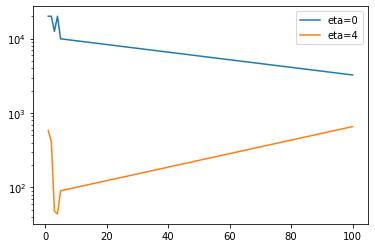

In [35]:
plt.semilogy(qs, sparsity_l1, label="eta=0")
plt.semilogy(qs, sparsity_l1_sparse, label="eta=4")
plt.legend()
plt.show()